In [15]:
import pandas as panda
import numpy as nump
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the wine dataset

wine_data = panda.read_csv('/content/WineQuality_data.csv')




In [16]:
#Data Inspection:
# Check the first few rows to get an overview of the data
print(wine_data.head())
# Inspect the data types and check for missing values
print(wine_data.info())

# Check for any missing values
print(wine_data.isnull().sum())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [17]:
# Check the distribution of the 'quality' variable
print(wine_data['quality'].value_counts())

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


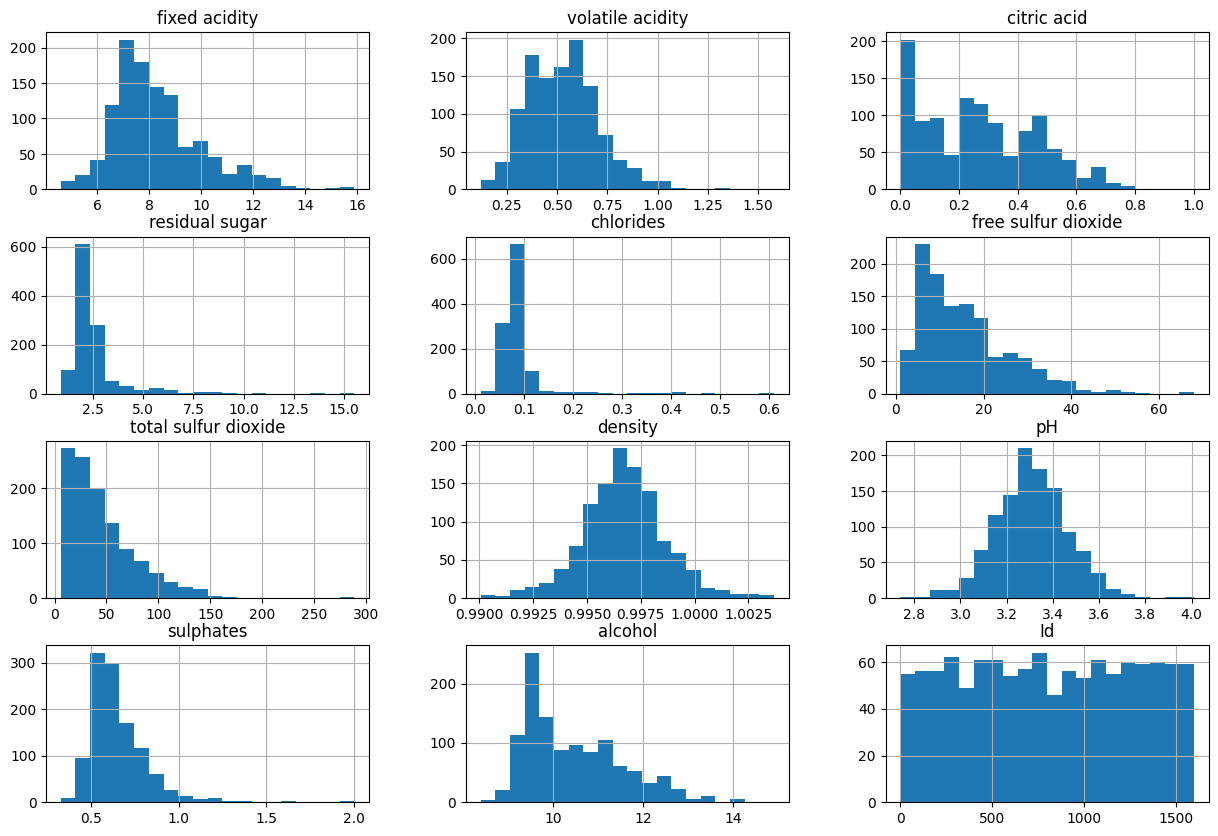

In [18]:
#Data Visualization
import matplotlib.pyplot as plt

# Plot histograms for each feature
wine_data.drop('quality', axis=1).hist(bins=20, figsize=(15, 10))
plt.show()


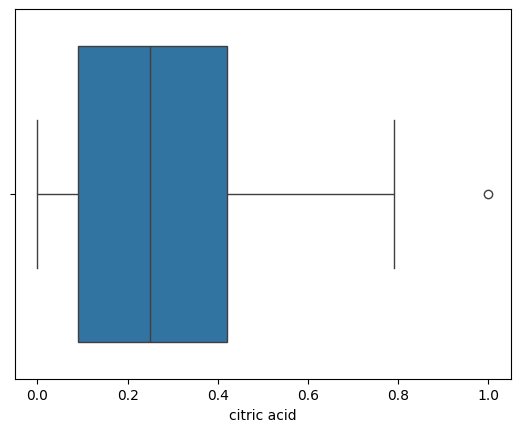

In [22]:
# Box Plots and Density Plots:
import seaborn as sns

# Boxplot for the 'citric acid' feature
sns.boxplot(x=wine_data['citric acid'])
plt.show()

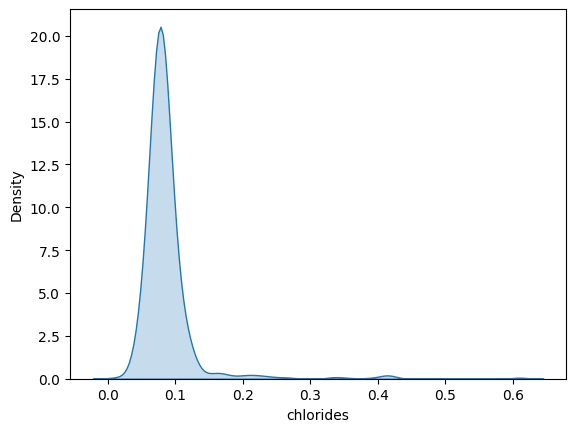

In [24]:
# Density plot for the 'clorides' feature
sns.kdeplot(wine_data['chlorides'], fill=True)
plt.show()

In [25]:
# Pairplot to check relationships between features
sns.pairplot(wine_data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

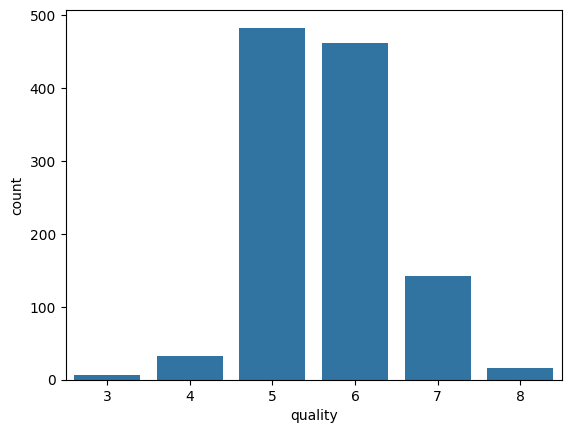

In [26]:
#Quality Distribution Visualization
sns.countplot(x='quality', data=wine_data)
plt.show()


In [28]:
# Data Preparation
wine_data.dropna(inplace=True)

In [29]:
# Class Imbalance:
from imblearn.over_sampling import SMOTE

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



In [30]:
#Feature Engineering:
#Normalization/Standardization of Features:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)  # or X, if you haven't resampled

In [31]:
#Splitting the Data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)


In [32]:
# Base Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create and train the model
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6051724137931035
Classification Report:
               precision    recall  f1-score   support

           3       0.85      1.00      0.92        97
           4       0.50      0.46      0.48        92
           5       0.59      0.53      0.56       108
           6       0.40      0.28      0.33        95
           7       0.48      0.50      0.49        96
           8       0.68      0.87      0.76        92

    accuracy                           0.61       580
   macro avg       0.58      0.61      0.59       580
weighted avg       0.58      0.61      0.59       580



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


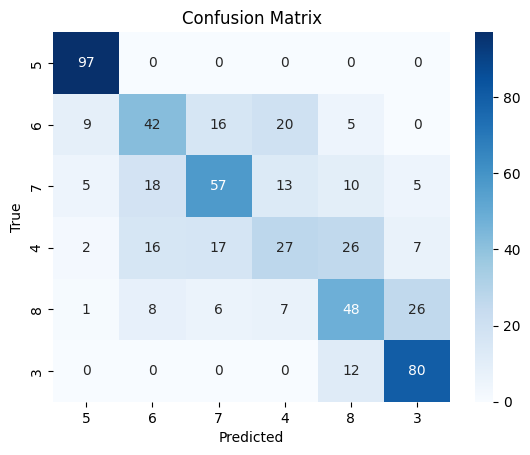

In [39]:
# . Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your target variable is 'quality' and you already have predictions (y_pred)
# Let's get the class names (unique quality values)
class_names = wine_data['quality'].unique()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [40]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt_model = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

# Apply Grid Search
grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best Parameters and Best Model
print("Best Parameters:", grid_search.best_params_)
print("Best Model Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Best Model Accuracy: 0.7506479481641468


In [35]:
# Test the Best-Tuned Model

final_model = grid_search.best_estimator_
y_final_pred = final_model.predict(X_test)

print("Final Model Accuracy:", accuracy_score(y_test, y_final_pred))
print("Final Model Classification Report:\n", classification_report(y_test, y_final_pred))


Final Model Accuracy: 0.7551724137931034
Final Model Classification Report:
               precision    recall  f1-score   support

           3       0.97      0.99      0.98        97
           4       0.73      0.84      0.78        92
           5       0.63      0.59      0.61       108
           6       0.53      0.42      0.47        95
           7       0.73      0.77      0.75        96
           8       0.90      0.95      0.92        92

    accuracy                           0.76       580
   macro avg       0.75      0.76      0.75       580
weighted avg       0.75      0.76      0.75       580



In [41]:
# Model Interpretation:
feature_importance = final_model.feature_importances_
feature_names = wine_data.columns[:-1]  # Exclude 'quality'
feature_importance_df = panda.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                 Feature  Importance
9              sulphates    0.155398
10               alcohol    0.127527
11               quality    0.118549
6   total sulfur dioxide    0.090744
1       volatile acidity    0.087695
4              chlorides    0.079533
7                density    0.071015
8                     pH    0.062942
0          fixed acidity    0.062198
5    free sulfur dioxide    0.054852
2            citric acid    0.049048
3         residual sugar    0.040500
